In [17]:
import numpy as np
import matplotlib.pyplot as plt

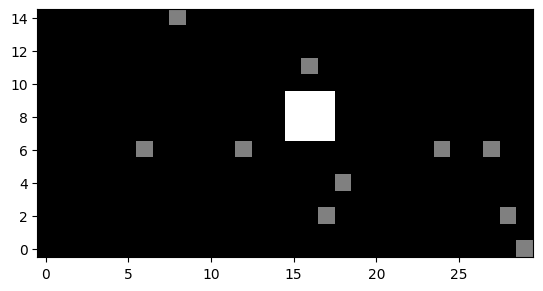

In [18]:
map_size_x = 1.5
map_size_y = 3
resolution = 0.1
grid =  np.zeros((int(map_size_x/resolution), int(map_size_y/resolution)))

pad_size_x = 0.30
pad_size_y = 0.30
pad_x = 0.75 / resolution
pad_y = 1.5 / resolution

grid[int(pad_x):int(pad_x+pad_size_x/resolution), int(pad_y):int(pad_y+pad_size_y/resolution)] = 0.2

grid[np.random.randint(0, grid.shape[0], 10), np.random.randint(0, grid.shape[1], 10)] = 0.1

plt.imshow(grid, cmap='gray', origin='lower')
plt.show()

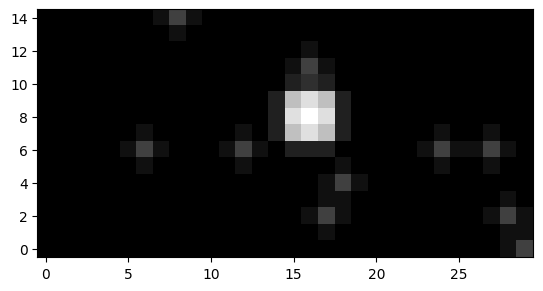

In [19]:
from scipy.signal import convolve2d

# Perform convolution
kernel = np.array([[0, 1, 0], [1, 4, 1], [0, 1, 0]])
grid2 = convolve2d(grid, kernel, mode='same', boundary='fill', fillvalue=0)

plt.imshow(grid2, cmap='gray', origin='lower')
plt.show()

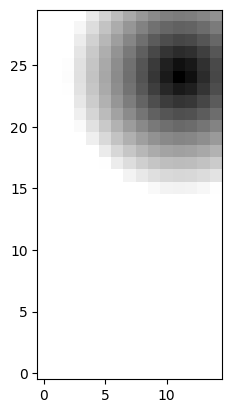

In [20]:
def get_potential(grid, goal: np.ndarray):
    # Get the potential field
    potential = np.zeros_like(grid)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            potential[i, j] = np.linalg.norm([i, j] - goal)
            
    return potential

goal = [1.2, 2.5]
potential = get_potential(grid2, goal)

plt.imshow(potential, cmap='gray', origin='lower')
plt.show()